In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import timeit
# from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [3]:
# Loading Dataset from local host 
data_kdd = pd.read_csv("~/Documents/Uwaterloo_Study_Docs/659_ECE/Research_Project/Datasets/DATASET/KDD_CUP_1999/Kaggle_kdd/kddcup.data_10_percent_corrected")
print("DATA: \n", data_kdd)

DATA: 
         0  tcp  http  SF  181  5450  0.1  0.2  0.3  0.4  ...  9.1  1.00.1  \
0       0  tcp  http  SF  239   486    0    0    0    0  ...   19     1.0   
1       0  tcp  http  SF  235  1337    0    0    0    0  ...   29     1.0   
2       0  tcp  http  SF  219  1337    0    0    0    0  ...   39     1.0   
3       0  tcp  http  SF  217  2032    0    0    0    0  ...   49     1.0   
4       0  tcp  http  SF  217  2032    0    0    0    0  ...   59     1.0   
...    ..  ...   ...  ..  ...   ...  ...  ...  ...  ...  ...  ...     ...   
494015  0  tcp  http  SF  310  1881    0    0    0    0  ...  255     1.0   
494016  0  tcp  http  SF  282  2286    0    0    0    0  ...  255     1.0   
494017  0  tcp  http  SF  203  1200    0    0    0    0  ...  255     1.0   
494018  0  tcp  http  SF  291  1200    0    0    0    0  ...  255     1.0   
494019  0  tcp  http  SF  219  1234    0    0    0    0  ...  255     1.0   

        0.00.6  0.11.1  0.00.7  0.00.8  0.00.9  0.00.10  0.00.11  n

In [4]:
data_kdd.shape

(494020, 42)

In [5]:
data_kdd.describe()

,0,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,...,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data_kdd.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
  'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
  'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
  'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
  'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
  'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']


data_kdd.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [7]:
print(data_kdd.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
data_kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [9]:
data_kdd.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

* There are no missing values in the Correctd.gz dataset

In [10]:
# NA value check
data_kdd.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# NaN Value Check
* 13 NAN value found in the Target column


In [11]:
# # Finding out indices for the NaN value 
data_kdd_nan = data_kdd.isnull().unstack()
t = data_kdd_nan[data_kdd_nan]
print("t: ", t)

t:  Series([], dtype: bool)


# Drop Na values


In [12]:
data_kdd.dropna(axis=0)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [13]:
data_kdd.iloc[:,1].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [14]:
data_kdd.iloc[:,41].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [15]:
data_kdd['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [17]:
data_kdd['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [18]:
len(data_kdd['target'].unique())

23

In [19]:
# Encoding Class Labels
# Protocol Mapping
protocol_map = {label: idx for idx, label in enumerate(np.unique(data_kdd['protocol_type']))}
print(protocol_map)
data_kdd['protocol_type'] = data_kdd['protocol_type'].map(protocol_map)


{'icmp': 0, 'tcp': 1, 'udp': 2}


In [20]:
# Service Mapping
service_map = {label: idx for idx, label in enumerate(np.unique(data_kdd['service']))}
print(service_map)
data_kdd['service'] = data_kdd['service'].map(service_map)

{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pm_dump': 41, 'pop_2': 42, 'pop_3': 43, 'printer': 44, 'private': 45, 'red_i': 46, 'remote_job': 47, 'rje': 48, 'shell': 49, 'smtp': 50, 'sql_net': 51, 'ssh': 52, 'sunrpc': 53, 'supdup': 54, 'systat': 55, 'telnet': 56, 'tftp_u': 57, 'tim_i': 58, 'time': 59, 'urh_i': 60, 'urp_i': 61, 'uucp': 62, 'uucp_path': 63, 'vmnet': 64, 'whois': 65}


In [21]:
# Flag Mapping 
flag_map = {label: idx for idx, label in enumerate(np.unique(data_kdd['flag']))}
print(flag_map)
data_kdd['flag'] = data_kdd['flag'].map(flag_map)


{'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}


In [22]:
# Target Mapping 
target_map = {label: idx for idx, label in enumerate(np.unique(data_kdd['target']))}
print(target_map)
data_kdd['target'] = data_kdd['target'].map(target_map)

{'back.': 0, 'buffer_overflow.': 1, 'ftp_write.': 2, 'guess_passwd.': 3, 'imap.': 4, 'ipsweep.': 5, 'land.': 6, 'loadmodule.': 7, 'multihop.': 8, 'neptune.': 9, 'nmap.': 10, 'normal.': 11, 'perl.': 12, 'phf.': 13, 'pod.': 14, 'portsweep.': 15, 'rootkit.': 16, 'satan.': 17, 'smurf.': 18, 'spy.': 19, 'teardrop.': 20, 'warezclient.': 21, 'warezmaster.': 22}


In [23]:
# Target mapping for Attacks and Normal 
data_kdd['target'] = data_kdd['target'].map({11:0, 0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1, 21:1, 22:1})
print(data_kdd.target.unique())

[0 1]


# Target Mapping 
* 0 --> Normal 
* 1 --> DoS CyberAttack  

In [24]:
print("DATA_KDD: \n", data_kdd)

DATA_KDD: 
         duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       22     9        239        486     0   
1              0              1       22     9        235       1337     0   
2              0              1       22     9        219       1337     0   
3              0              1       22     9        217       2032     0   
4              0              1       22     9        217       2032     0   
...          ...            ...      ...   ...        ...        ...   ...   
494015         0              1       22     9        310       1881     0   
494016         0              1       22     9        282       2286     0   
494017         0              1       22     9        203       1200     0   
494018         0              1       22     9        291       1200     0   
494019         0              1       22     9        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_

In [25]:
# pd.set_option('display.max_rows', None)


In [26]:
print("Target: \n", data_kdd['target']== 0)

Target: 
 0         True
1         True
2         True
3         True
4         True
          ... 
494015    True
494016    True
494017    True
494018    True
494019    True
Name: target, Length: 494020, dtype: bool


In [27]:
data_kdd.target.value_counts()

1    396743
0     97277
Name: target, dtype: int64

* Total count for the Attacks and without attacks 


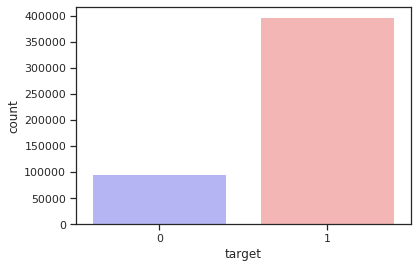

In [28]:
# Count plot for the Target 
sns.countplot(x = "target" , data = data_kdd, palette = "bwr")

In [31]:
# finding correlation with respect to the target 
data_kdd[data_kdd.columns[0:]].corr()['target'][:]

duration                      -0.118015
protocol_type                 -0.616600
service                       -0.131724
flag                          -0.155671
src_bytes                      0.000936
dst_bytes                     -0.037709
land                           0.002542
wrong_fragment                 0.023629
urgent                        -0.001498
hot                           -0.006327
num_failed_logins             -0.001060
logged_in                     -0.795280
num_compromised               -0.005046
root_shell                    -0.005871
su_attempted                  -0.008789
num_root                      -0.011006
num_file_creations            -0.018671
num_shells                    -0.014951
num_access_files              -0.054268
num_outbound_cmds                   NaN
is_host_login                       NaN
is_guest_login                -0.032300
count                          0.752977
srv_count                      0.566828
serror_rate                    0.227739


In [32]:
# Selection X and y values for Model performance check without Standardisation
X = data_kdd.drop(['target'], axis=1)
y = data_kdd['target']
print("X: \n", X)
print("y: \n", y)

X: 
         duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       22     9        239        486     0   
1              0              1       22     9        235       1337     0   
2              0              1       22     9        219       1337     0   
3              0              1       22     9        217       2032     0   
4              0              1       22     9        217       2032     0   
...          ...            ...      ...   ...        ...        ...   ...   
494015         0              1       22     9        310       1881     0   
494016         0              1       22     9        282       2286     0   
494017         0              1       22     9        203       1200     0   
494018         0              1       22     9        291       1200     0   
494019         0              1       22     9        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_count  

# Feature Selection 



In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(data_kdd)


array([[-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648],
       [-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648],
       [-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648],
       ...,
       [-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648],
       [-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648],
       [-0.06779179,  0.9257548 , -0.10406721, ..., -0.25203979,
        -0.24946427, -2.01952648]])

* Split the dataset into Training and Testing Dataset 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [35]:
print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

X_train:          duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
354787         0              1       45     5          0          0     0   
366692         0              1       45     5          0          0     0   
483695         0              1       22     9        248       3415     0   
490822         0              0       14     9       1032          0     0   
127627         0              1       45     5          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
259178         0              0       14     9       1032          0     0   
365838         0              1       45     5          0          0     0   
131932         0              0       14     9       1032          0     0   
146867         0              2       40     9        147          0     0   
121958         0              1       45     5          0          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_co

# Standardised Training and Test Set


In [36]:
sc.fit(X_train.values)
sc.fit(X_test.values)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print("X_train_std: \n",X_train_std)
print("X_test_std: \n", X_test_std)


X_train_std: 
 [[-0.06541052  0.93322585  1.60223707 ...  2.1714747  -0.25255569
  -0.25022552]
 [-0.06541052  0.93322585  1.60223707 ...  2.1714747  -0.25255569
  -0.25022552]
 [-0.06541052  0.93322585 -0.1002348  ... -0.46118837  0.13687058
  -0.07690132]
 ...
 [-0.06541052 -0.80956558 -0.69239893 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052  2.67601729  1.23213449 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052  0.93322585  1.60223707 ...  2.1714747  -0.25255569
  -0.25022552]]
X_test_std: 
 [[-0.06541052 -0.80956558 -0.69239893 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052 -0.80956558 -0.69239893 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052  0.93322585  1.60223707 ...  2.1714747  -0.25255569
  -0.25022552]
 ...
 [-0.06541052 -0.80956558 -0.69239893 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052 -0.80956558 -0.69239893 ... -0.46118837 -0.25255569
  -0.25022552]
 [-0.06541052  0.93322585  1.60223707 ...  2.1714747  -0.25255569
  -

# RandomForestClassifier
* with Standard X_train_std and X_test_std


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC_cl = RandomForestClassifier(random_state=42)
RFC_cl.fit(X_train_std, y_train)
pred_val = RFC_cl.predict(X_test_std)
acc_score = accuracy_score(y_test, pred_val)



In [44]:
print("RandomForestClassifier_Accuracy_score: ", acc_score)
print("predicted value: ", pred_val)

RandomForestClassifier_Accuracy_score:  0.9998110737756906
predicted value:  [1 1 1 ... 1 1 1]


# RandomForestClassifier
* with Normal X_train and X_test


In [52]:
RFC_cl_normal = RandomForestClassifier(random_state=42)
RFC_cl_normal.fit(X_train, y_train)
pred_val_normal = RFC_cl_normal.predict(X_test)
acc_score = accuracy_score(y_test, pred_val)
print("RandomForestClassifier_Accuracy_score: ", acc_score)
print("predicted_value: ", pred_val_normal)

RandomForestClassifier_Accuracy_score:  0.9998110737756906
predicted_value:  [1 1 1 ... 1 1 1]


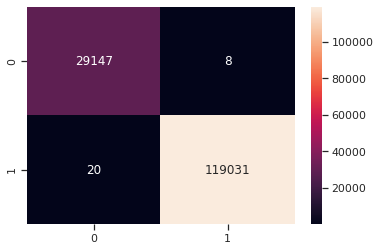

In [53]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, pred_val)
sns.heatmap(confusion_mat, annot=True, fmt="d")

In [48]:
print("Length of y_test: ", len(y_test))

Length of y_test:  148206


In [51]:
print("lenght with 0 value: ", len(y_test))

lenght with 0 value:  148206


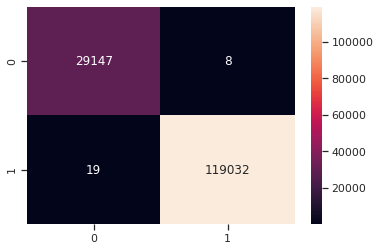

In [47]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, pred_val_normal)
sns.heatmap(confusion_mat, annot=True, fmt="d")

# Feature Selection 

In [55]:
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import RFECV






# Feature Selection using ExtraTreesClassifier
* Normal X_train and y_train

In [74]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [75]:
print(model.feature_importances_)


[7.61279181e-04 7.63373921e-02 1.47216447e-02 1.25826745e-02
 9.08891887e-03 1.40688608e-03 5.51524895e-06 7.36544485e-03
 1.08484187e-05 1.08953939e-02 2.23492206e-04 1.79485733e-01
 6.87259235e-03 7.65307267e-05 5.01368925e-06 5.97458621e-05
 5.13036296e-05 2.27642757e-05 2.44917577e-05 0.00000000e+00
 0.00000000e+00 7.26036533e-04 1.58291866e-01 6.70311851e-02
 2.01577890e-02 2.99525132e-02 1.15061601e-02 5.80884764e-03
 6.45455278e-02 7.26467010e-03 1.26333177e-02 6.72271569e-02
 3.39591108e-02 4.74835668e-02 6.98830332e-03 7.52785541e-02
 4.63565698e-03 2.63364852e-02 2.10066179e-02 7.09011306e-03
 1.20788562e-02]


In [76]:
print(model.decision_path)

<bound method BaseForest.decision_path of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)>


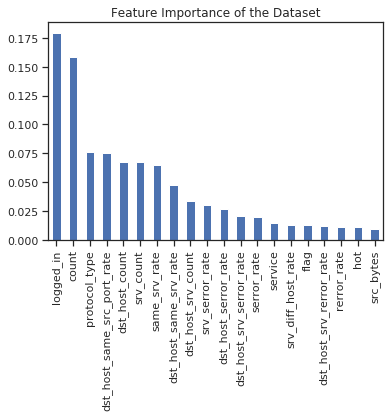

In [73]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(20).plot(kind='bar', title = 'Feature Importance of the Dataset')
plt.show()

* Standardised Dataset Feature Selection

In [77]:
model_std = ExtraTreesClassifier(random_state=42, n_jobs=-1)
model_std.fit(X_train_std, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

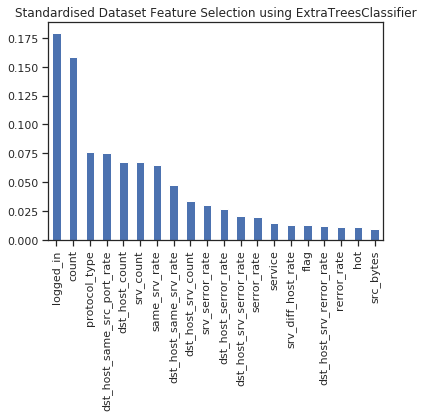

In [79]:
feature_importance_std = pd.Series(model.feature_importances_, index=X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

* No change in Features order from the Standard dataset and Normal Dataset 

# RFE Based Feature Selection with Cross Validation


In [82]:
rfe = RandomForestClassifier(random_state=42)

RecursiveFeatureEliminationCV = RFECV(estimator=rfe, step=1, cv=10, scoring='accuracy')
RecursiveFeatureEliminationCV = RecursiveFeatureEliminationCV.fit(X_train, y_train)
print('Most Important Features: ', RecursiveFeatureEliminationCV.n_features_)
print('Optimal Features are: ', X.columns[RecursiveFeatureEliminationCV.support_])

Most Important Features:  34
Optimal Features are:Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'num_root', 'num_file_creations',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


# Important features from RFE: 

* Most Important Features:  34
* Optimal Features are:Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'num_root', 'num_file_creations',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

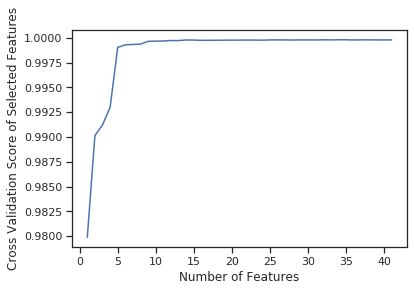

In [84]:
plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Cross Validation Score of Selected Features")
plt.plot(range(1, len(RecursiveFeatureEliminationCV.grid_scores_) + 1), RecursiveFeatureEliminationCV.grid_scores_)
plt.show()